Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's. Use a 10% significance level.

For this analysis, you'll use Official FIFA World Cup matches since 2002-01-01, and you'll also assume that each match is fully independent, i.e., team form is ignored.

The p-value and the result of the test must be stored in a dictionary called result_dict in the form:

result_dict = {"p_val": p_val, "result": result}

where p_val is the p-value and result is either the string "fail to reject" or "reject", depending on the result of the test.

How to approach the project
1. Exploratory data analysis

2. Filtering the data

3. Choosing the correct hypothesis test

4. Performing the hypothesis test

5. Interpreting the result of the hypothesis test

Exploratory data analysis
Load the data from men_results.csv and women_results.csv to understand its contents.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import mannwhitneyu

# Load men's and women's datasets
men = pd.read_csv(r"C:\Users\Administrator\Desktop\Personal Projects\Hypothesis Testing With Men's And Women's Soccer Matches\dataset\men_results.csv")
women = pd.read_csv(r"C:\Users\Administrator\Desktop\Personal Projects\Hypothesis Testing With Men's And Women's Soccer Matches\dataset\women_results.csv")



Filtering the data
Filter the data to only include official FIFA World Cup matches that took place after 2002-01-01.




In [2]:
# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]



Choosing the correct hypothesis test
Use EDA to determine the appropriate hypothesis test for this dataset and scenario.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12604\649097559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["group"] = "men"
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12604\649097559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset["group"] = "women"
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12604\649097559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

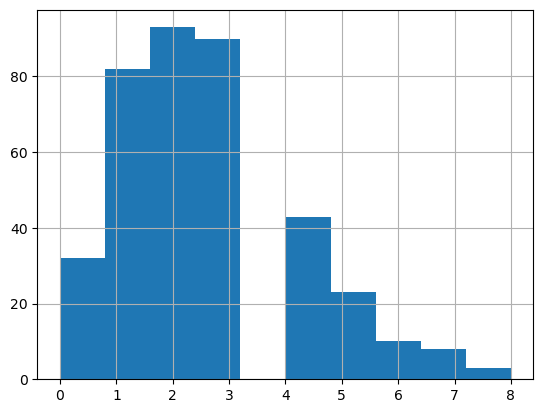

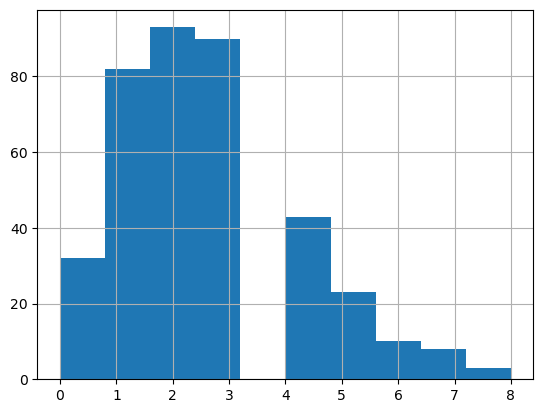

<Figure size 640x480 with 0 Axes>

In [3]:
# Create group and goals_scored columns
men_subset["group"] = "men"
women_subset["group"] = "women"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

# Determine normality using histograms
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)




Performing the hypothesis test
Once you've decided on the correct hypothesis test to perform, carry out the test to return the p-value.

In [4]:
!pip install pingouin

In [5]:
# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
import pingouin
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")

# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]




Interpreting the result of the hypothesis test
Interpret the p-value to determine if there is statistical significance between the two groups, assuming a 10% significance level.

In [6]:
# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}
